In [25]:
"""#PSQ4 
OLS with manual PCA
Using a box plot for outliers
Ridge: Manually calculating fstat, pvalue, 3 ways of calculating r2 and seeing if all match? 
Missing: Using crossval for the best alpha in Ridge (hyperparamater tuning parameter)"""

'#PSQ4 \nOLS with manual PCA\nUsing a box plot for outliers\nRidge: Manually calculating fstat, pvalue, 3 ways of calculating r2 and seeing if all match? \nMissing: Using crossval for the best alpha in Ridge (hyperparamater tuning parameter)'

In [39]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import os
import seaborn as sns
from scipy import stats
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

In [27]:
os.chdir('C:\\Users\\ABC\\6. Datasets')
df = pd.read_csv('RealEstate.csv')


In [28]:

df = df.drop(columns=['No'])

In [29]:
df.corr()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [30]:
#Applying OLS on parameter set 1
df
x = df.iloc[:,:-1]
y = df.iloc[:,-1] 
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary()) 

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.582
Model:                                    OLS   Adj. R-squared:                  0.576
Method:                         Least Squares   F-statistic:                     94.59
Date:                        Tue, 13 Aug 2024   Prob (F-statistic):           4.86e-74
Time:                                10:33:15   Log-Likelihood:                -1487.0
No. Observations:                         414   AIC:                             2988.
Df Residuals:                             407   BIC:                             3016.
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [31]:
#Applying OLS on parameter set 2
df
x1 = df.iloc[:,1:-1]
y1 = df.iloc[:,-1]
x1 = sm.add_constant(x1)

model2 = sm.OLS(y1,x1).fit()
print(model2.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.571
Model:                                    OLS   Adj. R-squared:                  0.566
Method:                         Least Squares   F-statistic:                     108.7
Date:                        Tue, 13 Aug 2024   Prob (F-statistic):           9.34e-73
Time:                                10:33:15   Log-Likelihood:                -1492.4
No. Observations:                         414   AIC:                             2997.
Df Residuals:                             408   BIC:                             3021.
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [32]:
#Applying OLS on parameter set 3
df.columns
x2 = df[['X2 house age',
       'X3 distance to the nearest MRT station']]
x2 = sm.add_constant(x2)
y2 = df.iloc[:, -1]
model3 = sm.OLS(y2,x2).fit()
print(model3.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.491
Model:                                    OLS   Adj. R-squared:                  0.489
Method:                         Least Squares   F-statistic:                     198.3
Date:                        Tue, 13 Aug 2024   Prob (F-statistic):           5.07e-61
Time:                                10:33:15   Log-Likelihood:                -1527.9
No. Observations:                         414   AIC:                             3062.
Df Residuals:                             411   BIC:                             3074.
Df Model:                                   2                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [33]:
#Applying OLS on parameter set 4
df.columns
x4 = df[['X5 latitude', 'X6 longitude']]
x4 = sm.add_constant(x4)
y4 = df.iloc[:,-1]

model5 = sm.OLS(y4,x4).fit()
print(model5.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.405
Model:                                    OLS   Adj. R-squared:                  0.402
Method:                         Least Squares   F-statistic:                     140.1
Date:                        Tue, 13 Aug 2024   Prob (F-statistic):           4.16e-47
Time:                                10:33:15   Log-Likelihood:                -1560.1
No. Observations:                         414   AIC:                             3126.
Df Residuals:                             411   BIC:                             3138.
Df Model:                                   2                                         
Covariance Type:                    nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

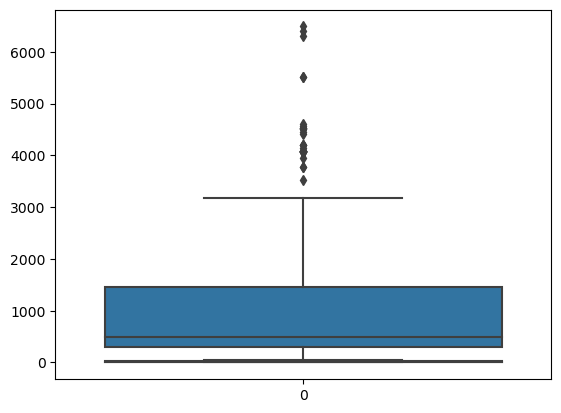

In [34]:
#Boxplot to check for outliers
sns.boxplot(data=df[['X2 house age', 'X4 number of convenience stores',]])
sns.boxplot(data=df['X3 distance to the nearest MRT station'])
df.columns 


In [35]:
#Applying OLS on parameter set 5
df
x5 = df['X3 distance to the nearest MRT station']
y5 = df.iloc[:,-1] 
x5 = sm.add_constant(x5)
model6 = sm.OLS(y5,x5).fit()
print(model6.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.454
Model:                                    OLS   Adj. R-squared:                  0.452
Method:                         Least Squares   F-statistic:                     342.2
Date:                        Tue, 13 Aug 2024   Prob (F-statistic):           4.64e-56
Time:                                10:33:15   Log-Likelihood:                -1542.5
No. Observations:                         414   AIC:                             3089.
Df Residuals:                             412   BIC:                             3097.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [36]:
#Applying OLS on parameter set 6
df
x6 = df['X4 number of convenience stores']
y6 = df.iloc[:,-1]
x6 = sm.add_constant(x6)

model7 = sm.OLS(y6,x6).fit()
print(model7.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.326
Model:                                    OLS   Adj. R-squared:                  0.324
Method:                         Least Squares   F-statistic:                     199.3
Date:                        Tue, 13 Aug 2024   Prob (F-statistic):           3.41e-37
Time:                                10:33:15   Log-Likelihood:                -1586.0
No. Observations:                         414   AIC:                             3176.
Df Residuals:                             412   BIC:                             3184.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [37]:
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [40]:
#Manually calculating the f stat anf r^2 value

for i in range(1000):
    lr = LinearRegression()
    r2 = r2_score
    x7 = df.iloc[:,:-1]
    y7 = df.iloc[:,-1]
    x7_train, x7_test,  y7_train, y7_test = train_test_split(x7,y7,test_size=0.2, random_state=i)
    model8 = lr.fit(x7_train, y7_train)
    y7_predict = lr.predict(x7_test) 
    a = np.sum((y7_predict-y7_test)**2)
    b = np.sum((y7_test.mean() - y7_predict)**2)
    rss1 = (b-a)/b
    rss2 = r2(y7_predict, y7_test)
    #print(rss1, rss2) #CALCULATION WAS RIGHT!!! F*** YOU!
    dfm1 = x7.shape[1] - 1
    dfm2 = x7.shape[0] - dfm1
    fstat = (b-a)/dfm1 * dfm2/a 
    pval = stats.f.sf(fstat, dfm1,dfm1)
    if rss1 > 0.69:
        print(i, rss1, pval)
    

323 0.6957092685031679 1.114291154457211e-05


In [42]:
#Side code: Ridge to see if a penalty term can favourably change the output
x7_train, x7_test,  y7_train, y7_test = train_test_split(x7,y7,test_size=0.2, random_state=323)
ri = Ridge(alpha=10)
ri.fit(x7_train, y7_train)
y7_ri_predict = ri.predict(x7_test) 
r2_ridge = r2(y7_ri_predict, y7_test)
r2_ridge
dfm1 = x7.shape[1] - 1
dfm2 = x7.shape[0] - dfm1
fstat = (b-a)/dfm1 * dfm2/a 
pval = stats.f.sf(fstat, dfm1,dfm1)
print(rss1, pval, r2_ridge)

0.5522707354315565 5.1284350452973653e-05 0.6159146014522675
